```
This and other code in Github repo git clone https://github.com/ChristoGH/mcb.git
```

In [1]:
%matplotlib inline

In [2]:
img_path='/media/lnr-ai/christo/github_repos/mcb/img/'

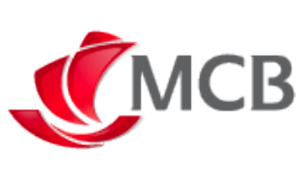

In [3]:
from IPython.display import Image
Image(filename=img_path+'Screenshot from 2020-03-10 05-52-40.png')

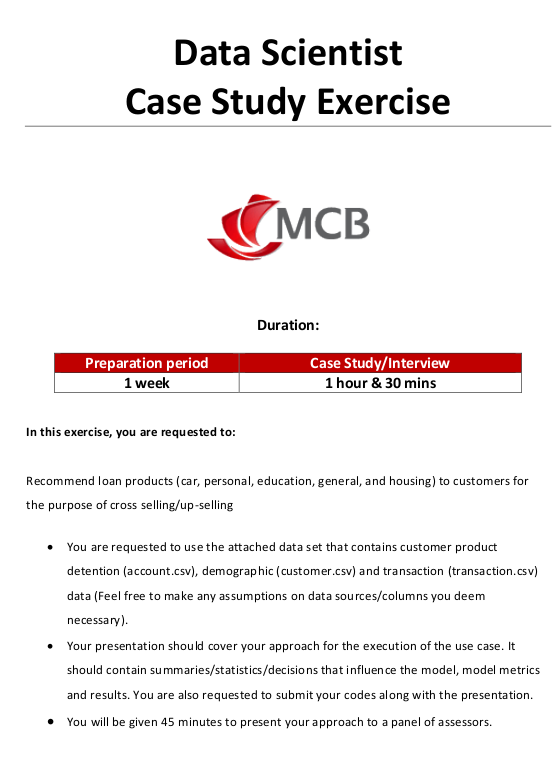

In [4]:
Image(filename='/media/lnr-ai/christo/github_repos/mcb/case_study/Screenshot from 2020-03-14 13-02-22.png')

```
The following analysis follows the route of an exploration of data, starting with the customer file.
```

### Import required libraries:

In [5]:
import pandas as pd # data frame approach
import numpy as np # numerical calcs
from pandas.tseries.offsets import BMonthEnd # finding the lasts business day of the month
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix

/home/lnr-ai/anaconda3/envs/mcb/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Define constants and filenames:

In [6]:
file_path = '/media/lnr-ai/christo/github_repos/mcb/data/'
glossary_fname = 'Glossary.xlsx'
customer_fname = 'customer.csv'
account_fname = 'account.csv'
transaction_fname = 'transaction.csv'

```
account.csv
customer.csv
transaction.csv
Glossary.xlsx
```

#### Define MCB colors:

In [7]:
mcb_red_dark = '#b90015'
mcb_red_light = '#f80234'
mcb_grey = '#5f6062'

#### Define utility functions:

In [8]:
def frac2date(x):
    return datetime(frac2year(x),frac2month(x),1)

def frac2month(x):
    f2m = int((x-np.floor(x))*12)==0
    return 3*f2m+(not f2m)*(int((x-np.floor(x))*12)+3)

def frac2year(x):
    return int(np.floor(x))

def bmonth_end_fn(x):
    offset = BMonthEnd()
    return offset.rollforward(x)

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Trade  Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Trade decisions missed(False Negatives): ', cm[1][0])
  print('Trade signals correctly detected (True Positives): ', cm[1][1])
  print('Total trade signals: ', np.sum(cm[1]))

#### Example conversion:

In [9]:
print(bmonth_end_fn(frac2date(x=2015.75)))

2015-12-31 00:00:00


### Read glossary definitions; store in dataframes:

In [10]:
# glossary_fname = 'Glossary.xlsx'
account_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Accounts')
customer_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Customer')
transaction_glossary_df=pd.read_excel(io=file_path+glossary_fname, sheet_name='Transactions')

### Load *.csv files and rename:

In [11]:
customer_df=pd.read_csv(filepath_or_buffer=file_path+customer_fname)
account_df=pd.read_csv(filepath_or_buffer=file_path+account_fname)
transaction_df=pd.read_csv(filepath_or_buffer=file_path+transaction_fname)

## Look at the Customer file:

### Headings:

In [12]:
customer_columns=list(customer_df)
list(customer_df)

['CIR',
 'RUN_DATE',
 'MARKET_SEGMENT_DESCRIPTION',
 'RESIDENT_FLAG',
 'GENDER',
 'MARITAL_STATUS_DESCRIPTION',
 'SALARY_AMOUNT',
 'NUMBER_OF_DEPENDANTS',
 'CERTIFICATION_ACHIEVEMENT_DESCRIPTION']

### Have a peek at the contents:

In [13]:
customer_df.head()

,CIR,RUN_DATE,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,MARITAL_STATUS_DESCRIPTION,SALARY_AMOUNT,NUMBER_OF_DEPENDANTS,CERTIFICATION_ACHIEVEMENT_DESCRIPTION
0,8803,9/28/2018,SEGMENT 18-25,Y,FEMALE,SINGLE,0.0,NaN,SECONDARY COMPLETE
1,8803,6/30/2015,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,NaN
2,8803,12/31/2015,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,NaN
3,8803,3/31/2016,SEGMENT 18-25,Y,FEMALE,SINGLE,NaN,NaN,SECONDARY COMPLETE
4,8803,6/30/2017,SEGMENT 18-25,Y,FEMALE,SINGLE,0.0,NaN,SECONDARY COMPLETE


### Look at the nature of the columns:

In [14]:
customer_df.dtypes

CIR                                        int64
RUN_DATE                                  object
MARKET_SEGMENT_DESCRIPTION                object
RESIDENT_FLAG                             object
GENDER                                    object
MARITAL_STATUS_DESCRIPTION                object
SALARY_AMOUNT                            float64
NUMBER_OF_DEPENDANTS                     float64
CERTIFICATION_ACHIEVEMENT_DESCRIPTION     object
dtype: object

In [15]:
customer_df.isna().sum(axis = 0).sort_values()

CIR                                          0
RUN_DATE                                     0
MARKET_SEGMENT_DESCRIPTION                   0
RESIDENT_FLAG                                0
GENDER                                     462
MARITAL_STATUS_DESCRIPTION                7526
CERTIFICATION_ACHIEVEMENT_DESCRIPTION    26188
SALARY_AMOUNT                            59086
NUMBER_OF_DEPENDANTS                     91769
dtype: int64

In [16]:
# customer_df_list=list(customer_df)
customer_df_list=['GENDER','MARITAL_STATUS_DESCRIPTION','CERTIFICATION_ACHIEVEMENT_DESCRIPTION']
for column_name in customer_df_list:
#     customer_df_list[4]
    np.where(customer_df[column_name].isna())
#     customer_df[column_name+'_MISSING']=0
    customer_df[column_name].fillna(column_name+'_MISSING', inplace=True)
#     customer_df.loc[customer_df[column_name].isna(), column_name+'_MISSING']
#     customer_df.loc[customer_df[column_name].isna(), column_name+'_MISSING']=1
#     print(sum(customer_df[column_name+'_MISSING']))

In [17]:
list(customer_df)

['CIR',
 'RUN_DATE',
 'MARKET_SEGMENT_DESCRIPTION',
 'RESIDENT_FLAG',
 'GENDER',
 'MARITAL_STATUS_DESCRIPTION',
 'SALARY_AMOUNT',
 'NUMBER_OF_DEPENDANTS',
 'CERTIFICATION_ACHIEVEMENT_DESCRIPTION']

In [18]:
customer_df['SALARY_AMOUNT'+'_MISSING']=0
customer_df.loc[customer_df['SALARY_AMOUNT'].isna(),'SALARY_AMOUNT'+'_MISSING']=1
customer_df['NUMBER_OF_DEPENDANTS'+'_MISSING']=0
customer_df.loc[customer_df['NUMBER_OF_DEPENDANTS'].isna(),'NUMBER_OF_DEPENDANTS'+'_MISSING']=1
customer_df['SALARY_AMOUNT'].fillna(customer_df['SALARY_AMOUNT'].mean(),inplace=True)
customer_df['NUMBER_OF_DEPENDANTS'].fillna(customer_df['NUMBER_OF_DEPENDANTS'].median(),inplace=True)

### Look at the CIR column:

#### # number of entries:

In [19]:
len(customer_df.CIR)

141169

#### # unique clients:

In [20]:
len(set(customer_df.CIR))

8909

#### Look at the RUN_DATE column:

In [21]:
customer_df.RUN_DATE

0          9/28/2018
1          6/30/2015
2         12/31/2015
3          3/31/2016
4          6/30/2017
             ...    
141164     3/29/2019
141165     3/29/2019
141166     3/29/2019
141167     3/29/2019
141168     3/29/2019
Name: RUN_DATE, Length: 141169, dtype: object

#### # of unique run dates:

In [22]:
set(customer_df.RUN_DATE)

{'12/29/2017',
 '12/30/2016',
 '12/31/2015',
 '12/31/2018',
 '3/29/2019',
 '3/30/2018',
 '3/31/2015',
 '3/31/2016',
 '3/31/2017',
 '6/29/2018',
 '6/30/2015',
 '6/30/2016',
 '6/30/2017',
 '9/28/2018',
 '9/29/2017',
 '9/30/2015',
 '9/30/2016'}

#### Convert RUN_DATE to a python date format:

In [23]:
customer_df['RUN_DATE'] = pd.to_datetime(customer_df['RUN_DATE'], infer_datetime_format=True)

In [24]:
customer_df['RUN_DATE']

0        2018-09-28
1        2015-06-30
2        2015-12-31
3        2016-03-31
4        2017-06-30
            ...    
141164   2019-03-29
141165   2019-03-29
141166   2019-03-29
141167   2019-03-29
141168   2019-03-29
Name: RUN_DATE, Length: 141169, dtype: datetime64[ns]

In [25]:
# Define the start_date and end_date:
start_date=min(customer_df['RUN_DATE'])
end_date=max(customer_df['RUN_DATE'])
print('the start date of analysis is:', start_date, ' and the end date is: ',end_date)

the start date of analysis is: 2015-03-31 00:00:00  and the end date is:  2019-03-29 00:00:00


In [26]:
# Look at the number of entries per date:
customer_df['RUN_DATE'].value_counts()

2019-03-29    8893
2018-12-31    8770
2018-09-28    8748
2018-06-29    8672
2018-03-30    8590
2017-12-29    8516
2017-09-29    8424
2017-06-30    8356
2017-03-31    8291
2016-12-30    8218
2016-09-30    8151
2016-06-30    8084
2016-03-31    8016
2015-12-31    7959
2015-09-30    7893
2015-06-30    7835
2015-03-31    7753
Name: RUN_DATE, dtype: int64

In [27]:
# Create a variable containing all run dates:
run_dates=list(set(customer_df.RUN_DATE))

In [28]:
df=customer_df[customer_df.RUN_DATE==start_date]
df.shape

(7753, 11)

In [29]:
df=customer_df[customer_df.RUN_DATE==end_date]
df.shape

(8893, 11)

### MARKET_SEGMENT_DESCRIPTION:

In [30]:
df['MARKET_SEGMENT_DESCRIPTION'].value_counts()

MASS                        7021
SEGMENT 18-25               1200
MASS AFFLUENT                486
MCB SELECT INTERNATIONAL      66
PRIVATE BANKING               66
MCB SELECT                    54
Name: MARKET_SEGMENT_DESCRIPTION, dtype: int64

In [31]:
df=customer_df[['CIR','MARKET_SEGMENT_DESCRIPTION','RUN_DATE']].groupby(['CIR','MARKET_SEGMENT_DESCRIPTION']).max()

In [32]:
gf=df.reset_index()

In [33]:
gf['RUN_DATE'].value_counts()

2019-03-29    8893
2018-09-28     150
2015-12-31     148
2015-03-31     129
2016-09-30     123
2017-06-30     111
2016-06-30     109
2018-03-30      85
2016-12-30      82
2017-09-29      81
2017-03-31      77
2016-03-31      75
2015-09-30      73
2017-12-29      68
2015-06-30      63
2018-06-29      52
2018-12-31      46
Name: RUN_DATE, dtype: int64

In [34]:
customer_df.dtypes

CIR                                               int64
RUN_DATE                                 datetime64[ns]
MARKET_SEGMENT_DESCRIPTION                       object
RESIDENT_FLAG                                    object
GENDER                                           object
MARITAL_STATUS_DESCRIPTION                       object
SALARY_AMOUNT                                   float64
NUMBER_OF_DEPENDANTS                            float64
CERTIFICATION_ACHIEVEMENT_DESCRIPTION            object
SALARY_AMOUNT_MISSING                             int64
NUMBER_OF_DEPENDANTS_MISSING                      int64
dtype: object

In [35]:
customer_df.MARKET_SEGMENT_DESCRIPTION.value_counts()

MASS                        111768
SEGMENT 18-25                19949
MASS AFFLUENT                 7047
PRIVATE BANKING                960
MCB SELECT                     854
INTERNATIONAL                  417
MCB SELECT INTERNATIONAL       127
UPPER MASS                      35
YOUNG PROFESSIONAL              12
Name: MARKET_SEGMENT_DESCRIPTION, dtype: int64

In [36]:
len(gf.CIR)-len(set(gf.CIR))

1456

#### Create dummy columns:

In [37]:
gf=pd.get_dummies(customer_df['MARKET_SEGMENT_DESCRIPTION'])
MARKET_SEGMENT_DESCRIPTION_COLUMNS=list(gf)
customer_df=customer_df.merge(gf, left_index=True, right_index=True)

In [38]:
# prepare data for plotting:
d=customer_df['MARKET_SEGMENT_DESCRIPTION'].value_counts()
df=d.to_frame()
df.reset_index(inplace=True)
df.rename(columns={'index':'MARKET_SEGMENT_DESCRIPTION','MARKET_SEGMENT_DESCRIPTION':'number'},inplace=True)

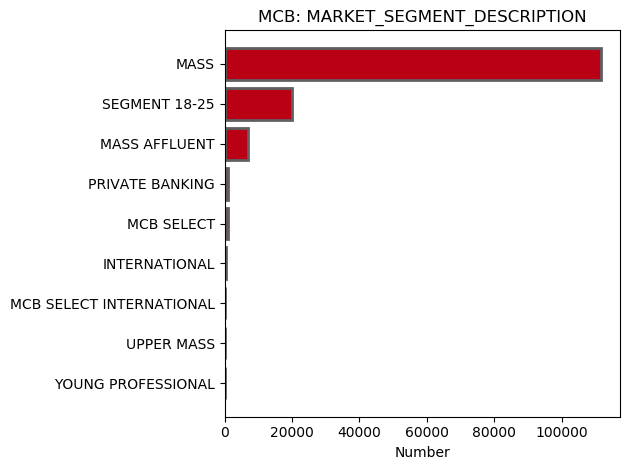

In [39]:
plt.rcdefaults()
fig, ax = plt.subplots()
MARKET_SEGMENT_DESCRIPTION = list(df.MARKET_SEGMENT_DESCRIPTION)
y_pos = np.arange(len(MARKET_SEGMENT_DESCRIPTION))
number = list(df.number)
ax.barh(y_pos, number, color=mcb_red_dark, edgecolor=mcb_grey, linewidth=2)#, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(MARKET_SEGMENT_DESCRIPTION)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number')
ax.set_title('MCB: MARKET_SEGMENT_DESCRIPTION')
plt.tight_layout()
# save and display plot:
plt.savefig(fname=img_path+'MARKET_SEGMENT_DESCRIPTION'+'.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

### Explore RESIDENT_FLAG

In [40]:
customer_df['RESIDENT_FLAG'].value_counts(dropna=False)

Y    137150
N      4019
Name: RESIDENT_FLAG, dtype: int64

In [41]:
customer_df['RESIDENT']=1
customer_df.loc[customer_df['RESIDENT_FLAG']=='N', 'RESIDENT']=0
RESIDENT_COLUMNS=['RESIDENT']

In [42]:
resident_df=customer_df[['RUN_DATE','RESIDENT_FLAG', 'CIR']].groupby(['RUN_DATE','RESIDENT_FLAG']).count()
resident_df.reset_index(inplace = True)

In [43]:
resident_df=resident_df.pivot(index = 'RUN_DATE', columns='RESIDENT_FLAG', values='CIR').reset_index()
resident_df=resident_df.rename(columns={'N':'RESIDENT_FLAG_N',
                           'Y':'RESIDENT_FLAG_Y'})

In [44]:
np.ones(len(resident_df.RESIDENT_FLAG_Y))*min(resident_df.RESIDENT_FLAG_Y)
# resident_df.RESIDENT_FLAG_Y

array([7542., 7542., 7542., 7542., 7542., 7542., 7542., 7542., 7542.,
       7542., 7542., 7542., 7542., 7542., 7542., 7542., 7542.])

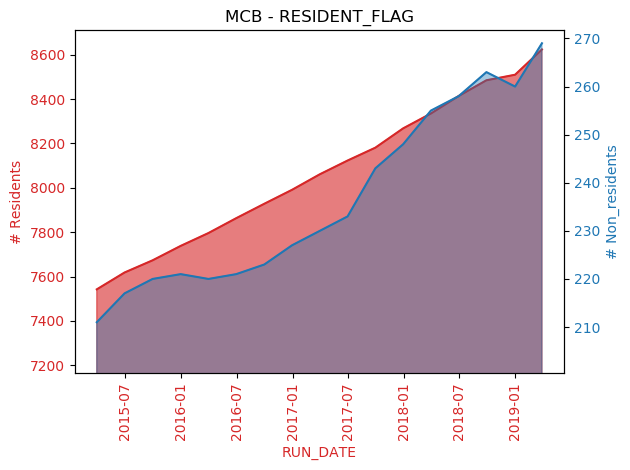

In [45]:
data1 = resident_df.RESIDENT_FLAG_N
data2 = resident_df.RESIDENT_FLAG_Y
x = resident_df.RUN_DATE
fig, ax1 = plt.subplots()
ax1.set_title(label='MCB - RESIDENT_FLAG')
min_y = min(resident_df.RESIDENT_FLAG_Y)*0.95
max_y = max(resident_df.RESIDENT_FLAG_Y)*1.01
min_n = min(resident_df.RESIDENT_FLAG_N)*0.95
max_n = max(resident_df.RESIDENT_FLAG_N)*1.01
color = 'tab:red'
ax1.set_xlabel('RUN_DATE', color=color)
ax1.set_ylabel('# Residents', color=color)
ax1.plot(x, data2, color=color)
ax1.tick_params(axis='y', labelcolor=color, labelrotation=0)
ax1.tick_params(axis='x', labelcolor=color, labelrotation=90)
ax1.set_ylim(bottom=min_y, 
             top=max_y) 
#              emit=True, auto=False, *, ymin=None, ymax=None)
ax1.fill_between(x, resident_df.RESIDENT_FLAG_Y,
                 color=color, alpha=0.6)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# Non_residents', color=color)  # we already handled the x-label with ax1
ax2.plot(x, data1, color=color)
ax2.tick_params(axis='y', labelcolor=color, labelrotation=0)
ax2.tick_params(axis='x', labelcolor=color, labelrotation=90)
ax2.fill_between(x, resident_df.RESIDENT_FLAG_N,
                 color=color, alpha=0.4)
ax2.set_ylim(bottom=min_n, 
             top=max_n) 
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.tight_layout()
plt.savefig(fname=img_path+'RESIDENT_FLAG'+'.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

### GENDER:

In [46]:
customer_df['GENDER'].value_counts(dropna=False)

MALE              57856
FEMALE            56504
MALE              13397
FEMALE            12950
GENDER_MISSING      462
Name: GENDER, dtype: int64

In [47]:
customer_df['GENDER'].str.strip().value_counts(dropna=False)

MALE              71253
FEMALE            69454
GENDER_MISSING      462
Name: GENDER, dtype: int64

In [48]:
customer_df['GENDER']=customer_df['GENDER'].str.strip()

In [49]:
customer_df['GENDER'].value_counts()

MALE              71253
FEMALE            69454
GENDER_MISSING      462
Name: GENDER, dtype: int64

In [50]:
# MARKET_SEGMENT_DESCRIPTION_COLUMNS,RESIDENT_COLUMNS,GENDER_COLUMNS

In [51]:
gf=pd.get_dummies(customer_df['GENDER'], dummy_na=False, drop_first=True)
GENDER_COLUMNS=list(gf)
customer_df.merge(gf, left_index=True, right_index=True)

,CIR,RUN_DATE,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,MARITAL_STATUS_DESCRIPTION,SALARY_AMOUNT,NUMBER_OF_DEPENDANTS,CERTIFICATION_ACHIEVEMENT_DESCRIPTION,SALARY_AMOUNT_MISSING,...,MASS AFFLUENT,MCB SELECT,MCB SELECT INTERNATIONAL,PRIVATE BANKING,SEGMENT 18-25,UPPER MASS,YOUNG PROFESSIONAL,RESIDENT,GENDER_MISSING,MALE
0,8803,2018-09-28,SEGMENT 18-25,Y,FEMALE,SINGLE,0.000000,2.0,SECONDARY COMPLETE,0,...,0,0,0,0,1,0,0,1,0,0
1,8803,2015-06-30,SEGMENT 18-25,Y,FEMALE,SINGLE,12730.199794,2.0,CERTIFICATION_ACHIEVEMENT_DESCRIPTION_MISSING,1,...,0,0,0,0,1,0,0,1,0,0
2,8803,2015-12-31,SEGMENT 18-25,Y,FEMALE,SINGLE,12730.199794,2.0,CERTIFICATION_ACHIEVEMENT_DESCRIPTION_MISSING,1,...,0,0,0,0,1,0,0,1,0,0
3,8803,2016-03-31,SEGMENT 18-25,Y,FEMALE,SINGLE,12730.199794,2.0,SECONDARY COMPLETE,1,...,0,0,0,0,1,0,0,1,0,0
4,8803,2017-06-30,SEGMENT 18-25,Y,FEMALE,SINGLE,0.000000,2.0,SECONDARY COMPLETE,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141164,7578,2019-03-29,MASS,Y,FEMALE,MARRIED COM,42000.000000,2.0,UNIVERSITY,0,...,0,0,0,0,0,0,0,1,0,0
141165,7433,2019-03-29,MASS,Y,FEMALE,MARRIED COM,0.000000,2.0,SECONDARY INCOMPLETE,0,...,0,0,0,0,0,0,0,1,0,0
141166,7437,2019-03-29,MASS,Y,MALE,MARRIED COM,11000.000000,2.0,SECONDARY COMPLETE,0,...,0,0,0,0,0,0,0,1,0,1
141167,7445,2019-03-29,MASS,Y,FEMALE,MARRIED COM,3300.000000,2.0,PRIMARY COMPLETE,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
list(gf)

['GENDER_MISSING', 'MALE']

In [53]:
d=customer_df['GENDER'].value_counts()
df=d.to_frame()
df.reset_index(inplace=True)
df.rename(columns={'index':'GENDER','GENDER':'number'},inplace=True)

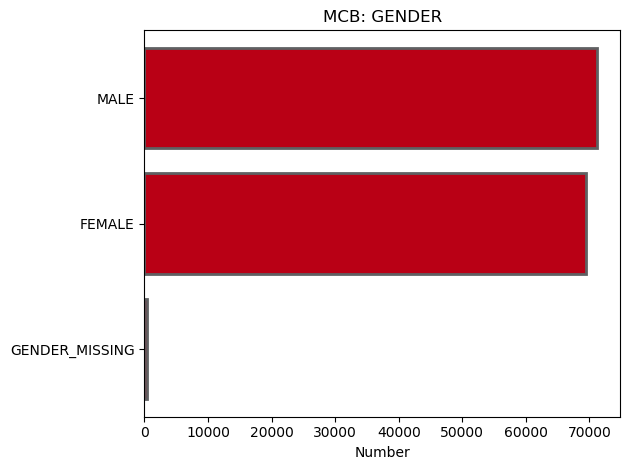

In [54]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
GENDER = list(df.GENDER)
y_pos = np.arange(len(GENDER))
number = list(df.number)
# error = np.random.rand(len(people))

ax.barh(y_pos, number, color=mcb_red_dark, edgecolor=mcb_grey, linewidth=2)#, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(GENDER)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number')
ax.set_title('MCB: GENDER')
plt.tight_layout()
plt.savefig(fname=img_path+'GENDER'+'.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

### MARITAL_STATUS_DESCRIPTION

In [55]:
customer_df['MARITAL_STATUS_DESCRIPTION'].value_counts()

MARRIED COM                           67931
SINGLE                                53777
MARITAL_STATUS_DESCRIPTION_MISSING     7526
WIDOWED                                4008
UNMARRIED COUPLE                       3092
DIVORCED                               2898
MARRIED SEP                            1937
Name: MARITAL_STATUS_DESCRIPTION, dtype: int64

In [56]:
marriage_df=customer_df[['RUN_DATE','MARITAL_STATUS_DESCRIPTION', 'CIR']].groupby(['RUN_DATE','MARITAL_STATUS_DESCRIPTION']).count()
marriage_df.reset_index(inplace = True)

In [57]:
marriage_df

,RUN_DATE,MARITAL_STATUS_DESCRIPTION,CIR
0,2015-03-31,DIVORCED,132
1,2015-03-31,MARITAL_STATUS_DESCRIPTION_MISSING,511
2,2015-03-31,MARRIED COM,3691
3,2015-03-31,MARRIED SEP,93
4,2015-03-31,SINGLE,2961
...,...,...,...
114,2019-03-29,MARRIED COM,4310
115,2019-03-29,MARRIED SEP,134
116,2019-03-29,SINGLE,3403
117,2019-03-29,UNMARRIED COUPLE,203


In [58]:
gf=pd.get_dummies(customer_df['MARITAL_STATUS_DESCRIPTION'], dummy_na=False, drop_first=True)
MARITAL_STATUS_DESCRIPTION_COLUMNS=list(gf)
customer_df=customer_df.merge(gf, left_index=True, right_index=True)

In [59]:
marriage_df=marriage_df.pivot(index = 'RUN_DATE', columns='MARITAL_STATUS_DESCRIPTION', values='CIR').reset_index()

In [60]:
d=customer_df['MARITAL_STATUS_DESCRIPTION'].value_counts()
df=d.to_frame()
df.reset_index(inplace=True)
df.rename(columns={'index':'MARITAL_STATUS_DESCRIPTION','MARITAL_STATUS_DESCRIPTION':'number'},inplace=True)

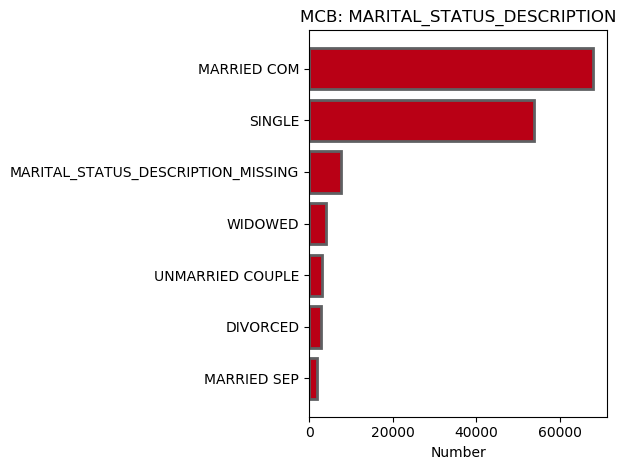

In [61]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
MARITAL_STATUS_DESCRIPTION = list(df.MARITAL_STATUS_DESCRIPTION)
y_pos = np.arange(len(MARITAL_STATUS_DESCRIPTION))
number = list(df.number)
# error = np.random.rand(len(people))

ax.barh(y_pos, number, color=mcb_red_dark, edgecolor=mcb_grey, linewidth=2)#, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(MARITAL_STATUS_DESCRIPTION)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number')
ax.set_title('MCB: MARITAL_STATUS_DESCRIPTION')
plt.tight_layout()
plt.savefig(fname=img_path+'MARITAL_STATUS_DESCRIPTION'+'.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()
plt.show()

### SALARY_AMOUNT

In [62]:
x=customer_df[customer_df['RUN_DATE']==end_date]['SALARY_AMOUNT']
# run_dates
# np.where(~customer_df[customer_df['RUN_DATE']==run_dates[0]]['SALARY_AMOUNT'].isna())

In [63]:
np.where(customer_df['SALARY_AMOUNT'].isna())

(array([], dtype=int64),)

In [64]:
x

132276        0.0
132277        0.0
132278    10000.0
132279     6700.0
132280     6000.0
           ...   
141164    42000.0
141165        0.0
141166    11000.0
141167     3300.0
141168        0.0
Name: SALARY_AMOUNT, Length: 8893, dtype: float64

In [65]:
x[x>0]

132278    10000.0
132279     6700.0
132280     6000.0
132281     4500.0
132282     7300.0
           ...   
141162     7800.0
141163     5000.0
141164    42000.0
141166    11000.0
141167     3300.0
Name: SALARY_AMOUNT, Length: 6805, dtype: float64

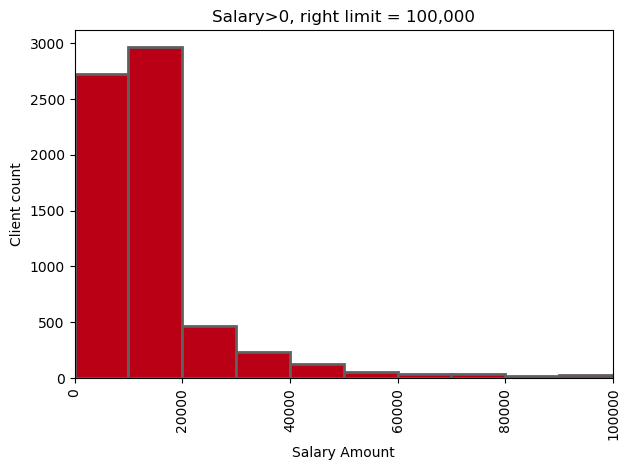

In [66]:
num_bins = 200
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x[x>0], num_bins,color=mcb_red_dark, edgecolor=mcb_grey, linewidth=2)

# add a 'best fit' line
# y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#      np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
# ax.plot(bins, y, '--')
ax.set_xlabel('Salary Amount')
ax.set_ylabel('Client count')
ax.set_title(r'Salary>0, right limit = 100,000')
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlim(left=0, right=100000)
# Tweak spacing to prevent clipping of ylabel
plt.tight_layout()
plt.savefig(fname=img_path+'SALARY'+'.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()
# plt.show()

### NUMBER_OF_DEPENDANTS

In [67]:
np.where(customer_df['NUMBER_OF_DEPENDANTS'].isna())

(array([], dtype=int64),)

In [68]:
d=customer_df['NUMBER_OF_DEPENDANTS'].value_counts()
df=d.to_frame()
df.reset_index(inplace=True)
df.rename(columns={'index':'NUMBER_OF_DEPENDANTS','NUMBER_OF_DEPENDANTS':'number'},inplace=True)

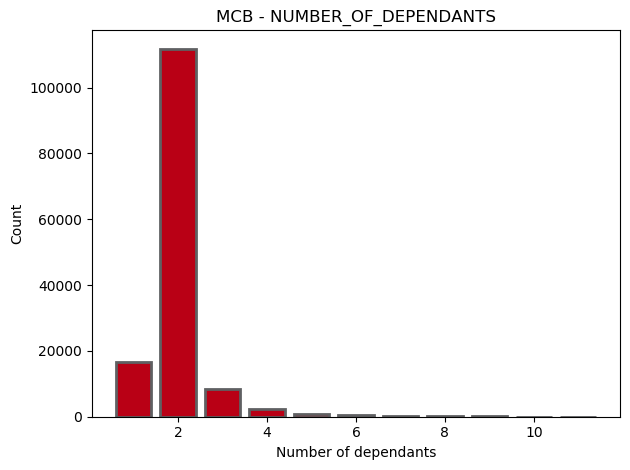

In [69]:
# fig = plt.figure()
fig, ax = plt.subplots()
# ax = fig.add_axes([0,0,1,1])
ax.set_title('MCB - NUMBER_OF_DEPENDANTS')
ax.set_xlabel('Number of dependants')
ax.set_ylabel('Count')
count = list(df.number)
NUMBER_OF_DEPENDANTS = list(df.NUMBER_OF_DEPENDANTS)
ax.bar(NUMBER_OF_DEPENDANTS,count, color=mcb_red_dark, edgecolor=mcb_grey, linewidth=2)
plt.tight_layout()
plt.savefig(fname=img_path+'NUMBER_OF_DEPENDANTS'+'.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

### CERTIFICATION_ACHIEVEMENT_DESCRIPTION

In [70]:
d=customer_df['CERTIFICATION_ACHIEVEMENT_DESCRIPTION'].value_counts()
df=d.to_frame()
df.reset_index(inplace=True)
df.rename(columns={'index':'certification','CERTIFICATION_ACHIEVEMENT_DESCRIPTION':'number'},inplace=True)

In [71]:
df

,certification,number
0,SECONDARY COMPLETE,39673
1,SECONDARY INCOMPLETE,29894
2,CERTIFICATION_ACHIEVEMENT_DESCRIPTION_MISSING,26188
3,PRIMARY COMPLETE,17152
4,UNIVERSITY,8447
5,PRIMARY INCOMPLETE,7613
6,PROFESSIONAL QUALIFICATION,4837
7,NONE,4031
8,TECHNICAL,3251
9,ILLITERATE,83


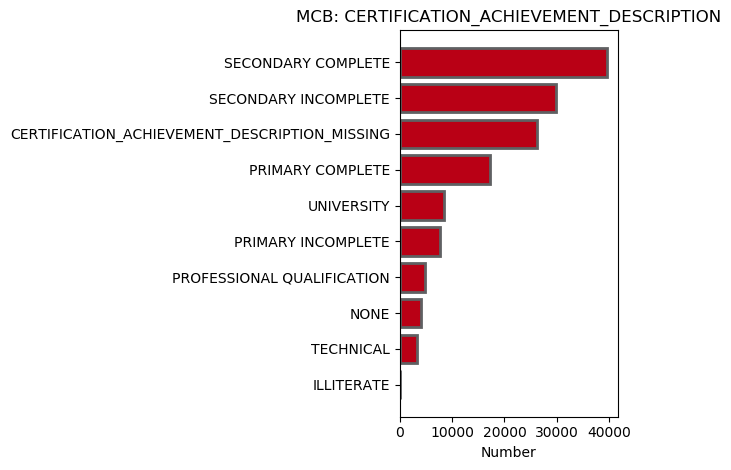

In [72]:
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data
certification = list(df.certification)
y_pos = np.arange(len(certification))
number = list(df.number)
# error = np.random.rand(len(people))

ax.barh(y_pos, number, color=mcb_red_dark, edgecolor=mcb_grey, linewidth=2)#, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(certification)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number')
ax.set_title('MCB: CERTIFICATION_ACHIEVEMENT_DESCRIPTION')
plt.tight_layout()
plt.savefig(fname=img_path+'CERTIFICATION_ACHIEVEMENT_DESCRIPTION'+'.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        metadata=None)
plt.show()

In [73]:
gf=pd.get_dummies(customer_df['CERTIFICATION_ACHIEVEMENT_DESCRIPTION'], dummy_na=False, drop_first=True)
CERTIFICATION_ACHIEVEMENT_DESCRIPTION_COLUMNS=list(gf.columns)
customer_df=customer_df.merge(gf, left_index=True, right_index=True)

In [74]:
customer_columns
keep_list=['CIR','RUN_DATE','SALARY_AMOUNT', 'NUMBER_OF_DEPENDANTS']

In [75]:
include_list=list(set(list(customer_df))-set(customer_columns))
include_list.extend(['CIR','RUN_DATE','SALARY_AMOUNT', 'NUMBER_OF_DEPENDANTS'])

In [76]:
cluster_list=list(set(include_list)-set(['RUN_DATE','CIR']))

In [77]:
f=customer_df.RUN_DATE==end_date
customer_scale_df = customer_df[f][cluster_list]

In [78]:
customer_df.to_csv('/media/lnr-ai/christo/github_repos/mcb/data/customer_df.csv',index=False)
customer_scale_df.to_csv('/media/lnr-ai/christo/github_repos/mcb/data/customer_scale_df.csv',index=False)

## Explore account detail:

### Load data:

In [79]:
account_df=pd.read_csv(filepath_or_buffer=file_path+account_fname)
account_df.pop('Unnamed: 0')
account_df.rename(columns={'Customer_number':'CIR'}, inplace = True)

In [80]:
CIR_LIST=list(set(account_df.CIR))

In [81]:
list(account_df)

['RUN_DATE',
 'CIR',
 'loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [82]:
heading_list=['loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [83]:
f=account_df.loan_car_application.isna()

In [84]:
account_df.loan_personal_application.value_counts(dropna=False)

NaN    149273
0.0       139
2.0        67
9.0        59
1.0        56
6.0        42
5.0        39
7.0        35
8.0        32
4.0        17
3.0         7
Name: loan_personal_application, dtype: int64

In [85]:
account_df['RUN_DATE'] = pd.to_datetime(account_df['RUN_DATE'], infer_datetime_format=True)

In [86]:
set(run_dates) - set(account_df['RUN_DATE'])

set()

In [87]:
a_df=account_df[account_df.RUN_DATE==run_dates[0]]
a_df.shape

(8827, 7)

In [88]:
list(a_df)

['RUN_DATE',
 'CIR',
 'loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [89]:
len(a_df.CIR)-len(set(a_df.CIR))

0

In [90]:
print(len(set(account_df.CIR)),len(set(customer_df.CIR)))

10000 8909


In [91]:
merge_account_df=account_df.merge(customer_df, left_on=['CIR', 'RUN_DATE'],right_on=['CIR', 'RUN_DATE'])

In [92]:
len(list(merge_account_df[merge_account_df.RUN_DATE==end_date].CIR))-len(list(set(merge_account_df[merge_account_df.RUN_DATE==end_date].CIR)))

0

In [93]:
merge_account_df[merge_account_df.RUN_DATE==end_date]

,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,...,WIDOWED,ILLITERATE,NONE,PRIMARY COMPLETE,PRIMARY INCOMPLETE,PROFESSIONAL QUALIFICATION,SECONDARY COMPLETE,SECONDARY INCOMPLETE,TECHNICAL,UNIVERSITY
123213,2019-03-29,8803,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,FEMALE,...,0,0,0,0,0,0,1,0,0,0
123214,2019-03-29,1,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,...,0,0,0,0,0,0,0,0,0,1
123215,2019-03-29,9060,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,...,0,0,0,0,0,0,0,1,0,0
123216,2019-03-29,8637,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,...,0,0,0,0,0,0,0,1,0,0
123217,2019-03-29,2,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131339,2019-03-29,8541,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,...,0,0,0,0,0,0,0,1,0,0
131340,2019-03-29,8802,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,...,0,0,0,0,0,0,0,1,0,0
131341,2019-03-29,8542,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,...,0,0,0,0,0,0,1,0,0,0
131342,2019-03-29,8543,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,...,0,0,0,0,0,0,0,1,0,0


In [94]:
merge_account_df[merge_account_df['loan_car_application'].isna()]

,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,...,WIDOWED,ILLITERATE,NONE,PRIMARY COMPLETE,PRIMARY INCOMPLETE,PROFESSIONAL QUALIFICATION,SECONDARY COMPLETE,SECONDARY INCOMPLETE,TECHNICAL,UNIVERSITY
0,2015-03-31,1,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,...,0,0,0,0,0,0,0,0,0,1
1,2015-03-31,3,NaN,NaN,NaN,NaN,NaN,MCB SELECT,Y,MALE,...,0,0,0,0,0,0,0,0,0,1
2,2015-03-31,6,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,...,0,0,0,0,0,0,1,0,0,0
3,2015-03-31,7,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,...,0,0,0,0,0,0,0,0,0,0
4,2015-03-31,8,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131339,2019-03-29,8541,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,...,0,0,0,0,0,0,0,1,0,0
131340,2019-03-29,8802,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,...,0,0,0,0,0,0,0,1,0,0
131341,2019-03-29,8542,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,...,0,0,0,0,0,0,1,0,0,0
131342,2019-03-29,8543,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,...,0,0,0,0,0,0,0,1,0,0


In [95]:
list(account_df)

['RUN_DATE',
 'CIR',
 'loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']

In [96]:
account_df[['loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']].isna().sum(axis = 0).sort_values()

loan_car_application          149273
loan_education_application    149273
loan_general_application      149273
loan_housing_application      149273
loan_personal_application     149273
dtype: int64

In [97]:
f1=account_df.RUN_DATE==end_date
f2=account_df.loan_car_application.isna()
g1=np.logical_and(f1, f2)
g2=np.logical_and(f1,~f2)
# (f1) and (f2)
noloan_cir = account_df[g1].CIR
loan_cir = account_df[g2].CIR

In [98]:
noloan_cir

140562    8803
140563       1
140564    9060
140565    8637
140566       2
          ... 
149761    8541
149762    8802
149763    8542
149764    8543
149765    8890
Name: CIR, Length: 9181, dtype: int64

In [99]:
merge_account_df[merge_account_df.RUN_DATE==end_date]

,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application,MARKET_SEGMENT_DESCRIPTION,RESIDENT_FLAG,GENDER,...,WIDOWED,ILLITERATE,NONE,PRIMARY COMPLETE,PRIMARY INCOMPLETE,PROFESSIONAL QUALIFICATION,SECONDARY COMPLETE,SECONDARY INCOMPLETE,TECHNICAL,UNIVERSITY
123213,2019-03-29,8803,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,FEMALE,...,0,0,0,0,0,0,1,0,0,0
123214,2019-03-29,1,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,...,0,0,0,0,0,0,0,0,0,1
123215,2019-03-29,9060,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,...,0,0,0,0,0,0,0,1,0,0
123216,2019-03-29,8637,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,...,0,0,0,0,0,0,0,1,0,0
123217,2019-03-29,2,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131339,2019-03-29,8541,NaN,NaN,NaN,NaN,NaN,SEGMENT 18-25,Y,MALE,...,0,0,0,0,0,0,0,1,0,0
131340,2019-03-29,8802,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,...,0,0,0,0,0,0,0,1,0,0
131341,2019-03-29,8542,NaN,NaN,NaN,NaN,NaN,MASS,Y,MALE,...,0,0,0,0,0,0,1,0,0,0
131342,2019-03-29,8543,NaN,NaN,NaN,NaN,NaN,MASS,Y,FEMALE,...,0,0,0,0,0,0,0,1,0,0


In [100]:
account_df[f1]

,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application
140562,2019-03-29,8803,NaN,NaN,NaN,NaN,NaN
140563,2019-03-29,1,NaN,NaN,NaN,NaN,NaN
140564,2019-03-29,9060,NaN,NaN,NaN,NaN,NaN
140565,2019-03-29,8637,NaN,NaN,NaN,NaN,NaN
140566,2019-03-29,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
149761,2019-03-29,8541,NaN,NaN,NaN,NaN,NaN
149762,2019-03-29,8802,NaN,NaN,NaN,NaN,NaN
149763,2019-03-29,8542,NaN,NaN,NaN,NaN,NaN
149764,2019-03-29,8543,NaN,NaN,NaN,NaN,NaN


In [101]:
account_df[g1][['loan_car_application',
 'loan_education_application',
 'loan_general_application',
 'loan_housing_application',
 'loan_personal_application']].shape

(9181, 5)

In [102]:
loan_cir

140813     248
140955     397
141011     453
141329     783
141921    1408
142396    1925
142499    2041
142588    2127
142648    2195
143014    2594
143720    3325
143879    3496
144429    3789
145400    3945
146560    5170
147278    5936
147672    6360
147970    6680
148637    7369
148851    7590
149260    8021
149444    8220
149535    8308
Name: CIR, dtype: int64

In [103]:
CIR_LIST=list(set(account_df.CIR))
account_df[account_df.CIR==list(loan_cir)[1]]

,RUN_DATE,CIR,loan_car_application,loan_education_application,loan_general_application,loan_housing_application,loan_personal_application
396,2015-03-31,397,0.0,0.0,0.0,0.0,9.0
8941,2015-06-30,397,NaN,NaN,NaN,NaN,NaN
17493,2015-09-30,397,NaN,NaN,NaN,NaN,NaN
26067,2015-12-31,397,NaN,NaN,NaN,NaN,NaN
34664,2016-03-31,397,NaN,NaN,NaN,NaN,NaN
43343,2016-06-30,397,NaN,NaN,NaN,NaN,NaN
52005,2016-09-30,397,NaN,NaN,NaN,NaN,NaN
60686,2016-12-30,397,NaN,NaN,NaN,NaN,NaN
69413,2017-03-31,397,NaN,NaN,NaN,NaN,NaN
78195,2017-06-30,397,NaN,NaN,NaN,NaN,NaN


### Explore transaction detail:

#### Read the transaction file:

In [104]:
transaction_df=pd.read_csv(filepath_or_buffer=file_path+transaction_fname)

In [105]:
transaction_df_list=list(transaction_df)
transaction_df_list

['CIR',
 'RUN_Date',
 'sum.amt_Bank Draft_N',
 'sum.amt_Bank Fee_N',
 'sum.amt_Bundle Fee_N',
 'sum.amt_Cash Depo_N',
 'sum.amt_Cash Out_N',
 'sum.amt_Cheque_N',
 'sum.amt_Contra Entry_N',
 'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N',
 'sum.amt_Direct Db_N',
 'sum.amt_FD Maturity_N',
 'sum.amt_FD Pre Closure_N',
 'sum.amt_FD Set Up_N',
 'sum.amt_Failed Direct Db_N',
 'sum.amt_Ignore_N',
 'sum.amt_Income_N',
 'sum.amt_Insurance_N',
 'sum.amt_Intr_N',
 'sum.amt_Inward Trnf_N',
 'sum.amt_Loan Repay_N',
 'sum.amt_Locker Depo_N',
 'sum.amt_Merchant Stlmt_N',
 'sum.amt_MoneyGram_N',
 'sum.amt_Others_N',
 'sum.amt_Out. Trnf_N',
 'sum.amt_Past Due_N',
 'sum.amt_Payment_N',
 'sum.amt_Refill_N',
 'sum.amt_Reject_N',
 'sum.amt_Securities_N',
 'sum.amt_Securities Purchase_N',
 'sum.amt_Securities Sale_N',
 'sum.amt_Stdin Order_N',
 'sum.amt_Trnf_N',
 'sum.amt_Unpaid Fee_N',
 'sum.amt_NA_N',
 'sum.amt_NA_P']

In [106]:
# set(customer_df.RUN_DATE)
# 8890
transaction_df[transaction_df.CIR==8890]

,CIR,RUN_Date,sum.amt_Bank Draft_N,sum.amt_Bank Fee_N,sum.amt_Bundle Fee_N,sum.amt_Cash Depo_N,sum.amt_Cash Out_N,sum.amt_Cheque_N,sum.amt_Contra Entry_N,sum.amt_Cr Intr_N,...,sum.amt_Refill_N,sum.amt_Reject_N,sum.amt_Securities_N,sum.amt_Securities Purchase_N,sum.amt_Securities Sale_N,sum.amt_Stdin Order_N,sum.amt_Trnf_N,sum.amt_Unpaid Fee_N,sum.amt_NA_N,sum.amt_NA_P
66030,8890,2016.00,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,-130.44,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66031,8890,2016.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-86.96,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66032,8890,2016.50,0.0,-3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,-304.36,-1870.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66033,8890,2016.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-173.92,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66034,8890,2017.25,0.0,-1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,-130.44,-800.00,0.0,0.0,0.0,0.0,-600.0,0.0,0.0,0.0
66035,8890,2017.50,0.0,-2.0,0.0,0.0,-60000.0,0.0,0.0,0.0,...,0.00,-800.00,0.0,0.0,0.0,0.0,-1500.0,0.0,0.0,0.0
66036,8890,2017.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,-1000.00,0.0,0.0,0.0,0.0,-3500.0,0.0,0.0,0.0
66037,8890,2018.00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-130.44,-10098.00,0.0,0.0,0.0,0.0,-15655.0,0.0,0.0,0.0
66038,8890,2018.25,0.0,-1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,-260.88,-979.19,0.0,0.0,0.0,0.0,-1300.0,0.0,0.0,0.0
66039,8890,2018.50,0.0,-1.0,0.0,0.0,-57000.0,0.0,0.0,0.0,...,-217.40,0.00,0.0,0.0,0.0,0.0,-4055.0,0.0,0.0,0.0


In [107]:
transaction_df['RUN_DATE_']=transaction_df.RUN_Date.apply(frac2date)

In [108]:
set(transaction_df['RUN_DATE_'])

{Timestamp('2015-03-01 00:00:00'),
 Timestamp('2015-06-01 00:00:00'),
 Timestamp('2015-09-01 00:00:00'),
 Timestamp('2015-12-01 00:00:00'),
 Timestamp('2016-03-01 00:00:00'),
 Timestamp('2016-06-01 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2016-12-01 00:00:00'),
 Timestamp('2017-03-01 00:00:00'),
 Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-09-01 00:00:00'),
 Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00')}

In [109]:
transaction_df['RUN_DATE']=transaction_df['RUN_DATE_'].apply(bmonth_end_fn)

In [110]:
df=transaction_df[transaction_df.RUN_DATE==end_date]

####  Clients repaying loans in the current (most recent month):

#### The following are 4 columns identified to illustrate/reflect loan repayment behaviour:

In [111]:
loan_behaviour_columns=['sum.amt_Loan Repay_N', 'sum.amt_Bank Draft_N',
                  'sum.amt_Past Due_N','sum.amt_Failed Direct Db_N']

In [112]:

loan_repayers=df[df['sum.amt_Loan Repay_N']<0]['CIR']
len(np.where(df['sum.amt_Loan Repay_N']<0)[0])

404

In [113]:
# Clients servicing Bank Drafts sum.amt_Bank Draft_N
bank_draft_clients=df[df['sum.amt_Bank Draft_N']<0]['CIR']
len(np.where(df['sum.amt_Bank Draft_N']==0)[0])

7000

In [114]:
# # clients without sum.amt_Past Due_N
past_due_clients=df[df['sum.amt_Past Due_N']<0]['CIR']
len(np.where(df['sum.amt_Past Due_N']==0)[0])

6759

In [115]:
# clients without sum.amt_Failed Direct Db_N
failed_direct_clients=df[df['sum.amt_Failed Direct Db_N']<0]['CIR']
len(np.where(df['sum.amt_Failed Direct Db_N']==0)[0])

6981

In [116]:
print('# loan_repayers: ',len(loan_repayers), ' # bank_draft_clients',len(bank_draft_clients))

# loan_repayers:  404  # bank_draft_clients 38


In [117]:
print('# past_due_clients: ',len(past_due_clients), ' # failed_direct_clients',len(failed_direct_clients))

# past_due_clients:  279  # failed_direct_clients 57


In [118]:
set_loan_repayers=set(loan_repayers)
set_bank_draft_clients=set(bank_draft_clients)
set_loan_repayers.intersection(set_bank_draft_clients)

{890,
 2041,
 2120,
 2564,
 3323,
 3325,
 3789,
 4757,
 5186,
 5679,
 5936,
 6360,
 6680,
 6913,
 8764}

In [119]:
repayers=set()
repayers.update(set_loan_repayers)
repayers.update(set_bank_draft_clients)

In [120]:
len(repayers)

427

In [121]:
defaulting_clients=set()
defaulting_clients.update(set(past_due_clients))
defaulting_clients.update(set(failed_direct_clients))
# +set(failed_direct_clients)

In [122]:
len(defaulting_clients)

326

In [123]:
len(repayers.intersection(defaulting_clients))

124

In [124]:
loan_cir_list = list(loan_repayers).copy()
loan_cir_list.extend(list(bank_draft_clients))
loan_cir_list.extend(list(defaulting_clients))

In [125]:
loan_cir_list=list(set(loan_cir_list))

### In this section we try to determine 'good' from 'bad' clients ito loan behaviour

#### Apply LightGBM and machine learning  to classify 'good' repayers from 'bad' repayers:

In [126]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from pandas import datetime as dt

/home/lnr-ai/anaconda3/envs/mcb/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


In [127]:
from matplotlib import pyplot
# from collections import defaultdict
# from sklearn.cluster import KMeans
#import matplotlib.pyplot as plt
#%%
import lightgbm as lgb
import genetic_algorithm as gen
# import random
import pickle

In [128]:
#%% SHAP Values
import shap
import matplotlib.pylab as pl
shap.initjs()

In [129]:
def save_date_fn():
   return str(dt.now().year) + str('{n:02d}'.format(n=dt.now().month))+str('{n:02d}'.format(n=dt.now().day))

def lgb_x_val_auc(param_list):
    
    lr = param_list[0]
    spw = param_list[1]
    mb = int(param_list[2])
    nl = int(param_list[3])
    mcw = int(param_list[4])
    ss = param_list[5]
    csbt = param_list[6]
    alpha = param_list[7]
    mgts = param_list[8]
    mdil = int(param_list[9])
    rl = param_list[10]
    bfreq = int(param_list[11])
#     early_stopping_rounds = int(param_list[12])
#     feature_fraction= param_list[13]
#     bagging_fraction= param_list[14]
    
    lgb_param = {'boosting_type': 'gbdt',
                     'num_leaves': nl,
                     'min_data_in_leaf': mdil,
                     'max_depth': -1,
                     'learning_rate': lr,
                     'min_gain_to_split': mgts,
#                     'n_estimators': num_trees,
                     'max_bin': mb,
                     # 'scale_pos_weight':1,
                     # "objective" : "multiclass",
                     # "num_class" : len(y.unique()),
                     'objective': 'binary',
                     'min_child_weight': mcw,
                     'subsample': ss,
                     'colsample_bytree': csbt,
                     'reg_alpha': alpha,
                     'reg_lambda': rl,
                     'seed': myseed,
                     'num_threads': ttu,
                     'scale_pos_weight': spw,
                     'bagging_freq':bfreq,
#                      'feature_fraction':feature_fraction,
#                      'bagging_fraction':bagging_fraction,
                     'missing': None,
                     'verbose':-1}

#     lgbtrain = lgb.Dataset(data = X_train.values, label = y_train.values) #l_feature=[3])
    cvresult = lgb.cv(lgb_param, lgbtrain, nfold=cv_folds, num_boost_round= max_trees,
            metrics='auc', early_stopping_rounds=50, verbose_eval=False,seed=myseed)
    cvresult = pd.DataFrame.from_dict(cvresult, orient='columns', dtype=None)
    cur_res = cvresult.tail(1).values[0][0]
    # output_dict={}
    # output_dict[param_list]=param_list
    with open('train_log/lgb_'+save_date+'.txt', 'a') as f:
        print('-----------', file=f)
        print(list(param_list), file=f)
        print('ntrees: ',cvresult.shape[0], file=f)
        print('auc:',cur_res, file=f)
    return cur_res


In [130]:
train_df=transaction_df[transaction_df.CIR.isin(loan_cir_list)].copy()
# f=train_df.RUN_DATE==end_date
train_df=train_df[f].copy()

Boolean Series key will be reindexed to match DataFrame index.


In [131]:
set(train_df)-set(loan_behaviour_columns)

{'CIR',
 'RUN_DATE',
 'RUN_DATE_',
 'RUN_Date',
 'sum.amt_Bank Fee_N',
 'sum.amt_Bundle Fee_N',
 'sum.amt_Cash Depo_N',
 'sum.amt_Cash Out_N',
 'sum.amt_Cheque_N',
 'sum.amt_Contra Entry_N',
 'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N',
 'sum.amt_Direct Db_N',
 'sum.amt_FD Maturity_N',
 'sum.amt_FD Pre Closure_N',
 'sum.amt_FD Set Up_N',
 'sum.amt_Ignore_N',
 'sum.amt_Income_N',
 'sum.amt_Insurance_N',
 'sum.amt_Intr_N',
 'sum.amt_Inward Trnf_N',
 'sum.amt_Locker Depo_N',
 'sum.amt_Merchant Stlmt_N',
 'sum.amt_MoneyGram_N',
 'sum.amt_NA_N',
 'sum.amt_NA_P',
 'sum.amt_Others_N',
 'sum.amt_Out. Trnf_N',
 'sum.amt_Payment_N',
 'sum.amt_Refill_N',
 'sum.amt_Reject_N',
 'sum.amt_Securities Purchase_N',
 'sum.amt_Securities Sale_N',
 'sum.amt_Securities_N',
 'sum.amt_Stdin Order_N',
 'sum.amt_Trnf_N',
 'sum.amt_Unpaid Fee_N'}

In [132]:
train_df.isnull().sum(axis = 0)

CIR                                0
RUN_Date                           0
sum.amt_Bank Draft_N               0
sum.amt_Bank Fee_N                 0
sum.amt_Bundle Fee_N               0
sum.amt_Cash Depo_N                0
sum.amt_Cash Out_N                 0
sum.amt_Cheque_N                   0
sum.amt_Contra Entry_N             0
sum.amt_Cr Intr_N                628
sum.amt_Db Intr_N                  0
sum.amt_Direct Db_N                0
sum.amt_FD Maturity_N              0
sum.amt_FD Pre Closure_N           0
sum.amt_FD Set Up_N                0
sum.amt_Failed Direct Db_N         0
sum.amt_Ignore_N                   0
sum.amt_Income_N                 628
sum.amt_Insurance_N                0
sum.amt_Intr_N                     0
sum.amt_Inward Trnf_N              0
sum.amt_Loan Repay_N               0
sum.amt_Locker Depo_N              0
sum.amt_Merchant Stlmt_N           0
sum.amt_MoneyGram_N                0
sum.amt_Others_N                   0
sum.amt_Out. Trnf_N                0
s

In [ ]:
myseed = 0
cv_folds = 5
ttu = 6
max_trees = 10000
save_date = save_date_fn()

In [ ]:
transaction_df_list
exclude_list=['RUN_DATE_','RUN_DATE',
#     'sum.amt_Refill_N', 
#     'sum.amt_Others_N', 
#               'sum.amt_Stdin Order_N', 
              'sum.amt_Ignore_N', 'sum.amt_Intr_N', 'sum.amt_Bank Fee_N','sum.amt_Insurance_N',
              'sum.amt_Direct Db_N', 'sum.amt_Trnf_N', 'sum.amt_FD Set Up_N', 'sum.amt_Db Intr_N',
              'sum.amt_Cr Intr_N','sum.amt_Income_N', 'RUN_Date','CIR','sum.amt_Unpaid Fee_N']
train_list=list(set(transaction_df_list)-set(exclude_list)-set(loan_behaviour_columns))
train_list

In [ ]:
train_df['response']=0
train_df.loc[train_df.CIR.isin(repayers),'response']=1
train_df.loc[train_df.CIR.isin(defaulting_clients),'response']=0

In [ ]:
len(np.where(train_df['response']>0)[0])

In [ ]:
len(np.where(train_df['response']==0)[0])

In [ ]:
train_cols=list(set(train_df[train_list])-{'response'})
X = train_df[train_cols]

In [ ]:
y = train_df['response']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
learning_rate = 0.203 # learning_rate
scale_pos_weight=6.383 # scale_pos_weight
max_bin=349 # max_bin = int(mb),
num_leaves =1246 # 'num_leaves' = int(nl)
min_child_weight=18 # 'min_child_weight'= mcw,
subsample=0.5676 # 'subsample'= ss
colsample_bytree=0.4499 #'colsample_bytree': csbt,
reg_alpha=0.196369 # reg_alpha=alpha
min_gain_to_split=0.366 # min_gain_to_split
min_data_in_leaf=42 # 'min_data_in_leaf': int(mdil),
reg_lambda=0.843099 # reg_lambda
bagging_freq=7.6 
early_stopping_rounds=213# bagging_freq
feature_fraction= 0.507489
bagging_fraction= 0.87716599

In [ ]:
lgbtrain = lgb.Dataset(data = X_train.values, label = y_train.values)

In [ ]:
gen_params_list = [0.4760299341821466, 9.04766211425891, 143.6, 148.12, 0.9400000000000001, 0.7671729553616062, 0.4499, 0.196369, 0.17487845275739855, 42.0, 0.5436415806695059, 1.7000000000000002]
learning_rate, scale_pos_weight, max_bin, num_leaves,min_child_weight, subsample, colsample_bytree,reg_alpha, min_gain_to_split, min_data_in_leaf,reg_lambda,bagging_freq = gen_params_list

In [ ]:
first_guess = pd.DataFrame([gen_params_list])

In [ ]:
lgb_x_val_auc(gen_params_list)

In [ ]:
#%%
list_of_types = [
    'float', #learning_rate
                 'float', #scale_pos_weight
                 'int', #max_bin
                 'int', #num_leaves
                 'int', #min_child_weight
                 'float', #subsample
                 'float', #colsample_bytree
                 'float', #reg_alpha
                 'float', #min_gain_to_split
                 'int', #min_data_in_leaf
                 'float', #reg_lambda
                 'int', #bagging_freq
#                  'int', #early_stopping_rounds
#     'float',#feature_fraction
#     'float'#bagging_fraction
]
lower_bounds = [.001, 1, 20, 7, 1, .4, .4, 0, 0, 5, 1,0]
upper_bounds = [.5, 100, 511, 2047, 20, 1, 1, 100, 5, 120, 5,50]

#%%
pop_size = 1000
generations = 10

In [ ]:
print(len(list_of_types),first_guess.shape,len(lower_bounds), len(upper_bounds))

In [ ]:
best_gen_params, best_gen_scores = gen.evolve(list_of_types, lower_bounds, upper_bounds, 
                                          pop_size, first_guess, generations, lgb_x_val_auc,
                                          mutation_prob=.05, mutation_str=.2, 
                                          perc_strangers=.05, perc_elites=.1 
                                          )#,old_scores=first_guess_scores, save_gens=True)

In [ ]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    print('Bad Loans detected (True Negatives): ', cm[0][0])
    print('Bad loans missed (False Positives): ', cm[0][1])
    print('Good loans missed(False Negatives): ', cm[1][0])
    print('Good loans correctly detected (True Positives): ', cm[1][1])
    print('Total clients reviewed: ', np.sum(cm[1]))

In [ ]:
best_gen_params_list

In [ ]:
best_gen_params_list=list(best_gen_params.loc[0])

lgb_param = {'boosting_type': 'gbdt',
             'num_leaves': int(num_leaves),
             'min_data_in_leaf': int(min_data_in_leaf),
             'max_depth': -1,
             'learning_rate': learning_rate,
             'min_gain_to_split': min_gain_to_split,
              "objective" : "binary",
             # "num_class" : len(y.unique()),             
                    # 'n_estimators': n_trees,
             'max_bin': int(max_bin),
             # "objective" : "multiclass",
#             'objective': 'binary',
             'min_child_weight': min_child_weight,
             'subsample': subsample,
             'colsample_bytree': colsample_bytree,
             'reg_alpha': reg_alpha,
             'reg_lambda': reg_lambda,
             'seed': myseed,
             'num_threads': ttu,
             'scale_pos_weight': scale_pos_weight,
             'bagging_freq':int(bagging_freq),
             'missing': None,
             'verbose':1}

lgbtrain = lgb.Dataset(data = X_train.values, label = y_train.values)
estimator = lgb.train(lgb_param, lgbtrain, num_boost_round=10)

In [ ]:
predicted_y = estimator.predict(X_test)

In [ ]:
y_test.values

In [ ]:
plot_cm(y_test.values, predicted_y,0.89)

In [ ]:
cluster_df=df[['sum.amt_Bank Draft_N',
 'sum.amt_Bank Fee_N',
 'sum.amt_Bundle Fee_N',
 'sum.amt_Cash Depo_N',
 'sum.amt_Cash Out_N',
 'sum.amt_Cheque_N',
 'sum.amt_Contra Entry_N',
#  'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N',
 'sum.amt_Direct Db_N',
 'sum.amt_FD Maturity_N',
 'sum.amt_FD Pre Closure_N',
 'sum.amt_FD Set Up_N',
 'sum.amt_Failed Direct Db_N',
 'sum.amt_Ignore_N',
#  'sum.amt_Income_N',
 'sum.amt_Insurance_N',
 'sum.amt_Intr_N',
 'sum.amt_Inward Trnf_N',
 'sum.amt_Loan Repay_N',
 'sum.amt_Locker Depo_N',
 'sum.amt_Merchant Stlmt_N',
 'sum.amt_MoneyGram_N',
 'sum.amt_Others_N',
 'sum.amt_Out. Trnf_N',
 'sum.amt_Past Due_N',
 'sum.amt_Payment_N',
 'sum.amt_Refill_N',
 'sum.amt_Reject_N',
 'sum.amt_Securities_N',
 'sum.amt_Securities Purchase_N',
 'sum.amt_Securities Sale_N',
 'sum.amt_Stdin Order_N',
 'sum.amt_Trnf_N',
 'sum.amt_Unpaid Fee_N',
 'sum.amt_NA_N',
 'sum.amt_NA_P']]

In [ ]:
int((transaction_df.RUN_Date[2]-np.floor(transaction_df.RUN_Date[2]))*12)

In [ ]:
run_date_dict={}
run_date_dict['2015.00']=datetime(2015,3,31)
run_date_dict['2015.25']=datetime(2015,6,30)
run_date_dict['2015.50']=datetime(2015,9,30)
run_date_dict['2015.75']=datetime(2015,6,30)

In [ ]:
run_date_dict

In [ ]:


d=date.today()

offset = BMonthEnd()

#Last day of current month
offset.rollforward(d)

In [ ]:
temp_dates=list(set(gf['RUN_DATE']))

In [ ]:
temp_dates[0]

In [ ]:
for d in temp_dates:
    offset = BMonthEnd()
    #Last day of current month
    print(offset.rollforward(d))

In [ ]:
set(gf['RUN_DATE'])

In [ ]:
transaction_df['RUN_Date']

###  Do a review of all data:

In [ ]:
transaction_df[transaction_df.RUN_DATE==run_dates[0]]

In [ ]:
account_df[account_df.loan_car_application==0]

In [ ]:
CIR=7369
account_df[account_df.CIR==CIR]

In [ ]:
list(transaction_df)


In [ ]:
transaction_df[transaction_df.CIR==CIR]

In [ ]:
transaction_df[transaction_df.CIR==245][['sum.amt_Loan Repay_N', 'sum.amt_Cr Intr_N',
 'sum.amt_Db Intr_N', 'sum.amt_Direct Db_N','RUN_DATE']]

In [ ]:
list(transaction_df)